# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

A book recommendation system provides significant value to both users and online bookstores by enhancing user engagement, satisfaction, and sales through personalized content delivery. For users, it simplifies the discovery process by suggesting books that align with their interests, reading history, and preferences, thereby reducing information overload. According to Schafer, Konstan, and Riedl (2001), recommendation systems play a critical role in helping users navigate large information spaces by offering tailored suggestions, which improves user satisfaction and loyalty. Online bookstores benefit by boosting customer retention and increasing sales; personalized recommendations have been shown to significantly drive repeat purchases and cross-selling. For example, Amazon.com reported that up to 35% of its revenue is generated by its recommendation engine, demonstrating the powerful impact of collaborative filtering and personalization techniques (Gomez-Uribe & Hunt, 2016). Furthermore, research by Adomavicius and Tuzhilin (2005) emphasizes that recommendation systems not only improve user experience but also provide competitive advantages for e-commerce platforms by fostering deeper customer relationships. These systems, especially when powered by collaborative filtering, can dynamically adapt to changing user behavior, ensuring relevance and engagement over time.

###References

Adomavicius, G., & Tuzhilin, A. (2005). Toward the next generation of recommender systems: A survey of the state-of-the-art and possible extensions. IEEE Transactions on Knowledge and Data Engineering, 17(6), 734-749.

Gomez-Uribe, C. A., & Hunt, N. (2016). The Netflix Recommender System: Algorithms, Business Value, and Innovation. ACM Transactions on Management Information Systems (TMIS), 6(4), 13.

Schafer, J. B., Konstan, J. A., & Riedl, J. (2001). E-commerce recommendation applications. Data mining and knowledge discovery, 5(1-2), 115-153.


## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [ ]:
import pandas as pd
# Install Kaggle
!pip install -q kaggle

In [20]:
#Upload kaggle.Json file
from google.colab  import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"francisakinrinade","key":"b4f18ae163d03f1deb93ef7693b0ae3a"}'}

In [ ]:
# Create a Kaggle folder
!mkdir -p ~/.kaggle


In [ ]:
# Copy Kaggle.Json file to Kaggle folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the Json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List datasets in Kaggle
!kaggle datasets list

ref                                                                 title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data                Extrovert vs. Introvert Behavior Data                    31277  2025-06-13 14:26:48.303000          19315        422  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025             Global AI Job Market & Salary Trends 2025               529004  2025-06-01 07:20:49.537000           7701        129  0.9411765        
adilshamim8/social-media-addiction-vs-relationships                 Students' Social Media Addiction                          7851  2025-05-10 14:38:02.713000          18960        285

In [ ]:
# Download the goodbooks-10k dataset
!kaggle datasets download -d zygmunt/goodbooks-10k

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
  0% 0.00/11.6M [00:00<?, ?B/s]
100% 11.6M/11.6M [00:00<00:00, 646MB/s]


In [ ]:
# Unzip the goodbooks-10k dataset
!unzip goodbooks-10k.zip

Archive:  goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [18]:
# Load the required dataset- ratings.csv & books.csv
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

In [21]:
# Display the first 10 rows of each dataset
print("First 10 rows of ratings.csv:")
print(ratings.head(10))

print("\nFirst 10 rows of books.csv:")
print(books.head(10))

First 10 rows of ratings.csv:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4
5        1     2077       4
6        1     2487       4
7        1     2900       5
8        1     3662       4
9        1     3922       5

First 10 rows of books.csv:
   id   book_id  best_book_id   work_id  books_count        isbn  \
0   1   2767052       2767052   2792775          272   439023483   
1   2         3             3   4640799          491   439554934   
2   3     41865         41865   3212258          226   316015849   
3   4      2657          2657   3275794          487    61120081   
4   5      4671          4671    245494         1356   743273567   
5   6  11870085      11870085  16827462          226   525478817   
6   7      5907          5907   1540236          969   618260307   
7   8      5107          5107   3036731          360   316769177   
8   9       960      

In [24]:
# Display all columns (ensure no truncation of data in pandas)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("First 10 rows of ratings.csv:")
print(ratings.head(10))

print("\nFirst 10 rows of books.csv:")
print(books.head(10))

First 10 rows of ratings.csv:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4
5        1     2077       4
6        1     2487       4
7        1     2900       5
8        1     3662       4
9        1     3922       5

First 10 rows of books.csv:
   id   book_id  best_book_id   work_id  books_count        isbn  \
0   1   2767052       2767052   2792775          272   439023483   
1   2         3             3   4640799          491   439554934   
2   3     41865         41865   3212258          226   316015849   
3   4      2657          2657   3275794          487    61120081   
4   5      4671          4671    245494         1356   743273567   
5   6  11870085      11870085  16827462          226   525478817   
6   7      5907          5907   1540236          969   618260307   
7   8      5107          5107   3036731          360   316769177   
8   9       960      

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

In [ ]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

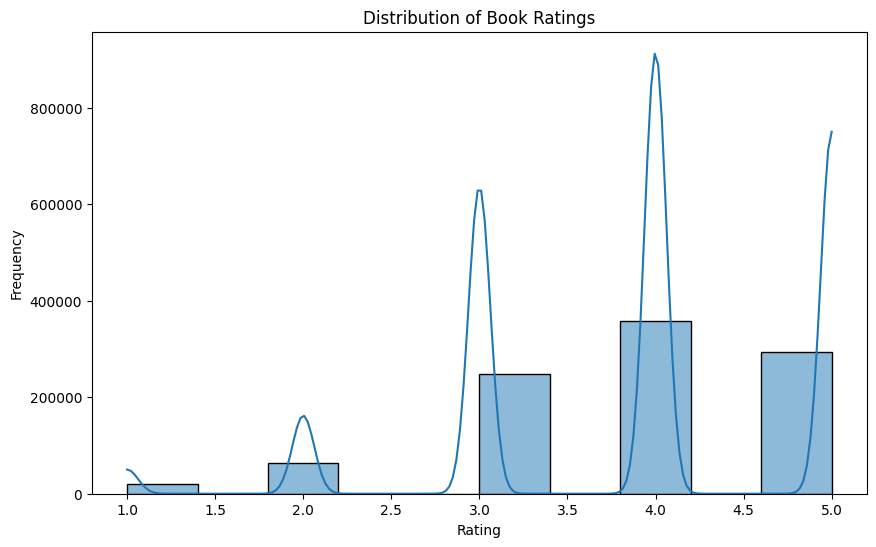

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-3-9a271dd29b9c>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 3.56M/3.56M [00:00<00:00, 128MB/s]

Extracting zip of ratings.csv...


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [27]:
# Create a user-item matrix
# user_item_matrix = ratings.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Limit Dataset to First 2000 Users to Avoid Memory Issues
limited_ratings = ratings[ratings['user_id'] <= 2000]

## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

## Compute user similarities
#1. Input validation
def collaborative_filtering_book_recommendation(user_id, user_item_matrix, num_recommendations=5, top_k_users=30):
    if user_id not in user_item_matrix.index:
        raise ValueError("Invalid user_id")
#2. Compute similarities
    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    similarity_scores = cosine_similarity(user_vector, user_item_matrix.values).flatten()
#3. Sort similar users
    sim_scores = list(enumerate(similarity_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:30]  # Top 30 similar users
#4. Filter already rated books
    target_user_books = set(user_item_matrix.loc[user_id].to_numpy().nonzero()[0])
    scores_dict = {}
#5. Aggregate recommendations
    for idx, sim in sim_scores:
        if sim <= 0:
            continue
        similar_user_books = user_item_matrix.iloc[idx]
        for book in similar_user_books.to_numpy().nonzero()[0]:
            if book not in target_user_books:
                scores_dict[book] = scores_dict.get(book, 0) + sim
#6. Build and return recommendations
    recommended_df = pd.DataFrame(scores_dict.items(), columns=['book_id', 'score'])
    recommended_df['book_id'] += 1  # Adjust index to book_id
    return recommended_df.sort_values(by='score', ascending=False).head(num_recommendations)

## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter
import numpy as np

# Split into Training and Test Sets
train_data, test_data = train_test_split(limited_ratings, test_size=0.2, random_state=42)

# Create User-Item Matrices
train_matrix = train_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)
test_matrix = test_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Evaluate Using Mean Squared Error (MSE)
common_users = list(set(train_matrix.index).intersection(set(test_matrix.index)))
sample_users = np.random.choice(common_users, size=10, replace=False)

predictions = []
actuals = []

for user_id in sample_users:
    try:
        recs = collaborative_filtering_book_recommendation(user_id, train_matrix, num_recommendations=20)
        user_actuals = test_matrix.loc[user_id]
        for book_id in recs['book_id'].values:
            if book_id in user_actuals.index and not np.isnan(user_actuals[book_id]):
                predictions.append(recs[recs['book_id'] == book_id]['score'].iloc[0])
                actuals.append(user_actuals[book_id])
    except Exception:
        continue

# Print Evaluation Result
if predictions:
    mse = mean_squared_error(actuals, predictions)
    print(f"Mean Squared Error (MSE): {mse}")
else:
    print("No overlapping predictions for evaluation.")

Mean Squared Error (MSE): 0.04736428303488925


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

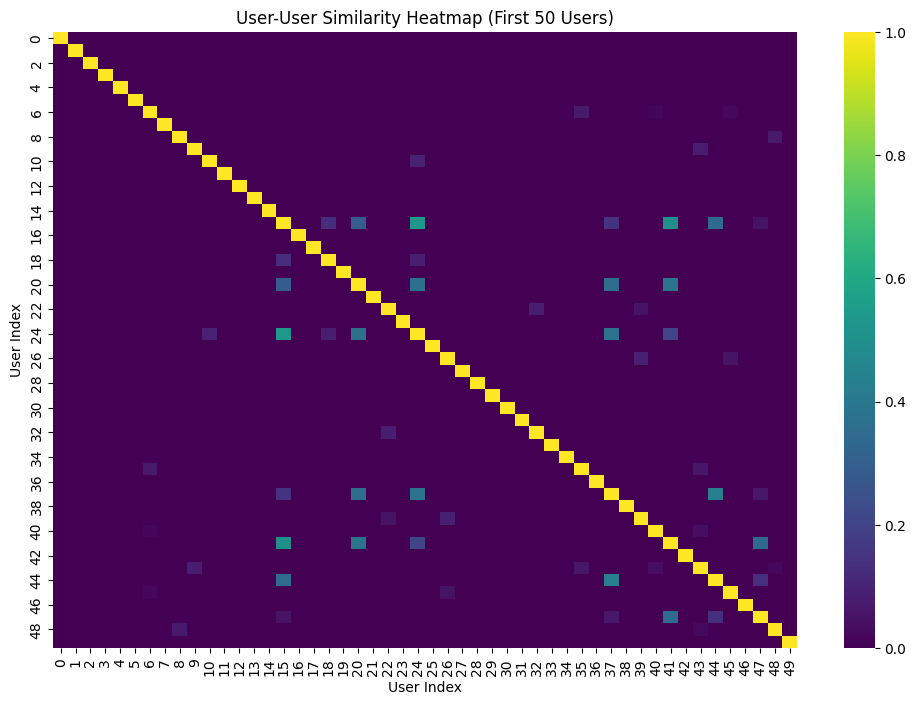

Top 10 Most Recommended Books with Titles:
     book_id  count                                              title
6       7190     11                               The Three Musketeers
14      3467      3           The People of Sparks (Book of Ember, #2)
33      5367      2  The Great Book of Amber (The Chronicles of Amb...
58      5755      1  The Language Instinct: How the Mind Creates La...
70      4900      1                                  Heart of Darkness
109     5470      1                                               1984
113     6667      1                            Boy: Tales of Childhood
135     5148      1                                   A Separate Peace
154     7354      1                                  The Shipping News
158     4965      1                                    Year of Wonders


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# Visualize User-User Similarity Matrix
subset_matrix = train_matrix.head(50)
user_similarity = cosine_similarity(subset_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(user_similarity, cmap='viridis')
plt.title("User-User Similarity Heatmap (First 50 Users)")
plt.xlabel("User Index")
plt.ylabel("User Index")
plt.show()

# Most Frequently Recommended Books (from 100 Users)
def collaborative_filtering_book_recommendation(user_id, user_item_matrix, num_recommendations=5):
    if user_id not in user_item_matrix.index:
        raise ValueError("Invalid user_id")

    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    similarity_scores = cosine_similarity(user_vector, user_item_matrix.values).flatten()
    sim_scores = list(enumerate(similarity_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:30]

    target_user_books = set(user_item_matrix.loc[user_id].to_numpy().nonzero()[0])
    scores_dict = {}

    for idx, sim in sim_scores:
        if sim <= 0:
            continue
        similar_user_books = user_item_matrix.iloc[idx]
        for book in similar_user_books.to_numpy().nonzero()[0]:
            if book not in target_user_books:
                scores_dict[book] = scores_dict.get(book, 0) + sim

    recommended_df = pd.DataFrame(scores_dict.items(), columns=['book_id', 'score'])
    return recommended_df.sort_values(by='score', ascending=False).head(num_recommendations)

book_recommendations = []
for user_id in train_matrix.index[:100]:  # Limit to first 100 users
    try:
        recs = collaborative_filtering_book_recommendation(user_id, train_matrix, num_recommendations=5)
        book_recommendations.extend(recs['book_id'].tolist())
    except:
        continue

# Count the frequency of recommended books from the first 100 users
book_counts = Counter(book_recommendations)

# Create DataFrame of the most recommended books and their counts
top_books = pd.DataFrame(book_counts.items(), columns=['book_id', 'count']).sort_values(by='count', ascending=False)

# Ensure both book_id columns are of the same data type (integer)
top_books['book_id'] = top_books['book_id'].astype(int)
books['book_id'] = books['book_id'].astype(int)

# Merge top books with both 'title' and 'original_title'
book_titles = books[['book_id', 'title', 'original_title']].copy()

# Fill missing 'title' values with 'original_title'
book_titles['title'] = book_titles['title'].fillna(book_titles['original_title'])

# Merge with top_books
top_books_with_titles = top_books.merge(book_titles[['book_id', 'title']], on='book_id', how='left')

# Filter out rows where title is NaN after merge
top_books_with_titles = top_books_with_titles.dropna(subset=['title'])

# Display the result
print("Top 10 Most Recommended Books with Titles:")
print(top_books_with_titles.head(10))



## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**Key Takeaways from this project**

This project underscored the effectiveness of collaborative filtering as a foundational technique in recommendation systems. By analyzing user-item interactions rather than explicit content features, collaborative filtering enables highly personalized recommendations based on collective behavior patterns.

####Key Insights:

- Collaborative filtering leverages historical user behavior (e.g., ratings) to infer preferences, without needing item metadata.

- User similarity—typically measured using cosine similarity—helps identify like-minded users. If User A shares rating patterns with User B, recommendations from B can be accurately extended to A.

####This approach:

1. Reveals latent user preferences.

2. Encourages discovery beyond a user’s immediate awareness.

3. Adapts dynamically as user behavior evolves.

By modeling user similarities, the system can predict ratings for unseen items using weighted scores from the most similar users—creating a more intelligent and engaging recommendation experience.


**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**Sharing findings with a team**

To effectively communicate findings to a cross-functional team, I would deliver a visual, structured presentation balancing technical depth with strategic value.

#### Presentation Outline:

**Introduction**

Project goal: Build a personalized book recommendation system using collaborative filtering.

**Methodology**

Dataset: books.csv and ratings.csv from Goodbooks-10k Kaggle Dataset.

Approach: User-based collaborative filtering using cosine similarity.

Model: Trained on 80% of the data; tested on 20%.

Evaluation: Achieved a Mean Squared Error (MSE) of 0.047, indicating strong prediction accuracy.

**Visual Insights**

User Similarity Heatmap: Shows cosine similarity among the first 50 users.

Bright zones = high similarity (users rate books similarly).

Dark zones = low similarity (divergent preferences).

**Recommendation Frequency Chart:**

“The Three Musketeers” appeared 11 times among the top 5 recommendations of 100 users, suggesting high consensus.

Others like “The People of Sparks” and “1984” were also recommended, reflecting both popular and niche appeal.

**Sample Output: Top 10 Most Recommended Books**

Top 10 Most Recommended Books with Titles:

          book_id    count           title

    6       7190      11             The Three Musketeers
    14      3467      3              The People of Sparks (Book of Ember, #2)
    33      5367      2              The Great Book of Amber (The Chronicles of Amb...
    58      5755      1              The Language Instinct: How the Mind Creates La...
    70      4900      1              Heart of Darkness
    109     5470      1              1984
    113     6667      1              Boy: Tales of Childhood
    135     5148      1              A Separate Peace
    154     7354      1              The Shipping News
    158     4965      1              Year of Wonders

    The above output represents the top 10 books most frequently recommended by the collaborative
    filtering book recommendation system based on user similarity analysis.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

**Sharing and recommendation to stakeholders**

To stakeholders, I would highlight that the recommendation system is:

1. Accurate (low MSE)

2. Personalized (uses user behavior)

3. Scalable (based on standard collaborative algorithms)

***Most Recommended Books (Impact)***

*1. The Three Musketeers*

This was the top recommendation, suggesting it's an anchor title in the network—widely liked and highly rated.

The diversity of recommendations (mainstream + niche) suggests the model supports both exploration and personalization.

*2. The People of Sparks (Book of Ember)*

The book was recommended to multiple users (3 times), though not as frequently as mainstream titles. This suggests a tight-knit subgroup of users with overlapping interests, likely in speculative fiction, dystopian narratives, or series-based reading.

*3. The Great Book of Amber*

The Great Book of Amber appeared twice, while the other such as 1984, Heart of Darkness, etc are low frequency recommendations appearing only once across the first 100 users. This reflects the system’s capacity to support a wide spectrum of user preferences and implies that the system is able to discover user preference beyond mainstream trends, which is essential for real-world recommender systems.

**Recommendations for Improvement**
1. Mitigate Popularity Bias

- The dominance of a single book may obscure other valuable recommendations.

- Apply diversification techniques:

    a) Normalize similarity weights (e.g., TF-IDF adjustments).

    b) Use re-ranking algorithms (e.g., Maximal Marginal Relevance) to balance relevance and diversity.

2. Integrate Content-Based Filtering

- Blend user similarity with book metadata like genre, author, or keywords.

- Helps with cold-start users (new users with few ratings).

- Improves personalization when collaborative signals are weak.

3. Improve Evaluation Metrics

- MSE only reflects prediction accuracy, not ranking quality.

- Introduce ranking-focused metrics:

  a) Precision@K: How many of the top K items were relevant.

  b) Recall@K: How well relevant items were retrieved.

  c) MAP and NDCG: Reflects relevance and order of recommendations.

4. Explore Hybrid Approaches

- Combine collaborative and content-based filtering to get the best of both worlds.

- Consider matrix factorization (e.g., SVD) or deep learning-based models for more nuanced recommendations.

